<a href="https://colab.research.google.com/github/Sumanthbabu-Muthineni/Regression_tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with neural networks in tensor flow
There are many definitions for regression, but in our case , we going
 to simplify it : Predicting a numerical variable based on some other combination of variables ,even shorter ..predicitng a number.


In [5]:
import tensorflow as tf
print(tf.__version__)

2.18.0


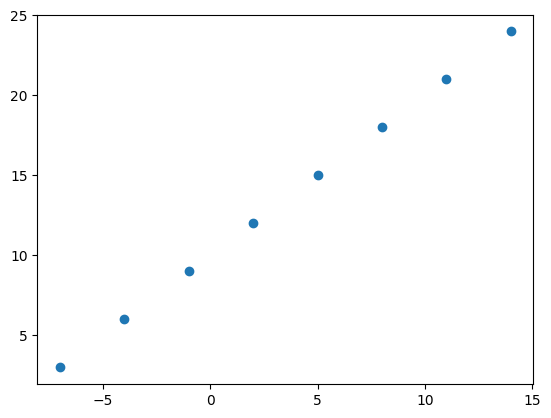

In [54]:
## Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
Y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0 ])

#Visulize it
plt.scatter(X,Y)

In [55]:
Y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output shapes

In [68]:
#Create  a demo tensor  for our housing price prediction problem
house_info =tf.constant(["bedroom", "bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [57]:
X[0],Y[0]

(np.float64(-7.0), np.float64(3.0))

In [58]:
X[1],Y[1]

(np.float64(-4.0), np.float64(6.0))

In [59]:
X[0].shape

()

In [60]:
X[0].ndim

0

In [61]:
input_shape =X.shape
output_shape=Y.shape
input_shape,output_shape

((8,), (8,))

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [63]:
input_shape=X[0].shape
output_shape=Y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

###Steps in modelling with tensorflow
1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model.
2. **Compiling a model** -define the loss function (in other words , the function which tells our model  how wrong it is) and the optimizer (tells our model how to improve the patterns  its learning) and evaluation metrics (what we can use to interpret the performance of pur model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels ).


In [74]:
#Set random seed
tf.random.set_seed(42)
#1 Create a model using the  Sequential API
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # Add input_shape to the first layer
])
#2 Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])   #mae is short form for mean absolute error... It computes the mean absolute error between labels and predictions
#SGD is short for stochastic gradient descent


#3 Fit the model
model.fit(X,Y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - loss: 14.8322 - mae: 14.8322
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 14.6997 - mae: 14.6997
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 14.5672 - mae: 14.5672
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 14.4347 - mae: 14.4347
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 14.3022 - mae: 14.3022


In [76]:
# Checkout X and Y
#Turn our numpy arrays to tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
Y=tf.cast(tf.constant(Y),dtype=tf.float32)

X,Y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [78]:
#Try and make a prediction usin our model
y_pred=model.predict(tf.constant([17.0])) # Convert the input to a tensor
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[-3.445745]], dtype=float32)

In [79]:
y_pred+14

array([[10.554255]], dtype=float32)

###Improivng our model